# Download data from Kaggle

In [ ]:
!rm -rf data
!rm -rf data/train
!rm -rf data/test

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 67 Oct 31 13:11 kaggle.json
{"username":"iampedroalz","key":"47ffd37645bd3e96f997dd90ce16762e"}

In [ ]:
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 112kB 10.2MB/s 
     |████████████████████████████████| 112kB 8.4MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 


In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2484           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13383            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4907            True  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         56           False  
tensorflow2-question-answering                 2020-01-22 23:59:00  Featured           $50,000        171            True  
data-science-bowl-2019                         2020-01-22 23:59:00  Featured          $160,000        375            True  
pku-auto

In [ ]:
# Download dataset
!mkdir -p data
!kaggle competitions download -c denoising-dirty-documents -p data

  0% 0.00/6.30M [00:00<?, ?B/s]
100% 6.30M/6.30M [00:00<00:00, 58.3MB/s]
 53% 5.00M/9.39M [00:00<00:00, 40.4MB/s]
100% 9.39M/9.39M [00:00<00:00, 60.1MB/s]
 41% 9.00M/21.9M [00:00<00:00, 17.6MB/s]
100% 21.9M/21.9M [00:00<00:00, 32.0MB/s]
 49% 9.00M/18.5M [00:00<00:00, 26.3MB/s]
100% 18.5M/18.5M [00:00<00:00, 46.7MB/s]


In [ ]:
# Unzip dataset
!unzip data/test.zip -d data
!unzip data/train.zip -d data
!unzip data/train_cleaned.zip -d data

Archive:  data/test.zip
   creating: data/test/
  inflating: data/test/1.png         
 extracting: data/test/10.png        
  inflating: data/test/100.png       
 extracting: data/test/103.png       
  inflating: data/test/106.png       
 extracting: data/test/109.png       
  inflating: data/test/112.png       
 extracting: data/test/115.png       
 extracting: data/test/118.png       
  inflating: data/test/121.png       
  inflating: data/test/124.png       
  inflating: data/test/127.png       
 extracting: data/test/13.png        
  inflating: data/test/130.png       
 extracting: data/test/133.png       
  inflating: data/test/136.png       
 extracting: data/test/139.png       
 extracting: data/test/142.png       
 extracting: data/test/145.png       
  inflating: data/test/148.png       
 extracting: data/test/151.png       
  inflating: data/test/154.png       
 extracting: data/test/157.png       
 extracting: data/test/16.png        
 extracting: data/test/160.png       
 e

# Install Deps

In [ ]:
!pip install tensorflow-gpu==2.0.0-alpha0

     |████████████████████████████████| 332.1MB 43kB/s 
     |████████████████████████████████| 3.0MB 40.9MB/s 
     |████████████████████████████████| 419kB 45.7MB/s 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread, imshow, imsave
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, array_to_img, img_to_array
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import datasets, layers, models,regularizers
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [ ]:
import os
print(os.listdir("data"))

['train.zip', 'sampleSubmission.csv.zip', 'test', 'test.zip', 'train', 'train_cleaned', 'train_cleaned.zip']


# Inspect Data

In [ ]:
input_dir  = Path('data')
train = input_dir / 'train'
train_cleaned = input_dir / 'train_cleaned'
test = input_dir / 'test'
train_images = sorted(os.listdir(train))
train_labels = sorted(os.listdir(train_cleaned))
test_images = sorted(os.listdir(test))

# Preprocess Data

In [ ]:
X = []
Y = []

for img in train_images:
    if img != "train":
        img = load_img(train / img, color_mode = "grayscale",target_size=(420,540))
        img = img_to_array(img).astype('float32')/255.
        X.append(img)

for img in train_labels:
    if img != "train_cleaned":
        img = load_img(train_cleaned / img, color_mode = "grayscale",target_size=(420,540))
        img = img_to_array(img).astype('float32')/255.
        Y.append(img)

X = np.array(X)
Y = np.array(Y)
X.shape,Y.shape

((144, 420, 540, 1), (144, 420, 540, 1))

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1)

# Define Model

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu' , input_shape=(420, 540, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (4,4), activation='relu', ))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2DTranspose(128, (3,3), activation='relu'))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.Conv2DTranspose(32, (3,3), activation='relu'))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.Conv2D(1, (5,5), activation='relu'))
model.compile(optimizer='Nadam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 418, 538, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 209, 269, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 206, 266, 64)      32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 103, 133, 64)      0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 105, 135, 128)     73856     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 210, 270, 128)     0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 212, 272, 32)      3

# Train

In [ ]:
import random
random_id=random.random()
callbacks = [
  tf.keras.callbacks.EarlyStopping(patience=200, monitor='val_loss',restore_best_weights=True),
]

In [ ]:
model.fit(X_train, y_train, epochs=200,batch_size=8,validation_data=(X_valid,y_valid),callbacks=callbacks)

Train on 129 samples, validate on 15 samples
Epoch 1/200
129/129 [==============================] - 7s 55ms/sample - loss: 0.0244 - val_loss: 0.0213
Epoch 2/200
129/129 [==============================] - 7s 54ms/sample - loss: 0.0254 - val_loss: 0.0224
Epoch 3/200
129/129 [==============================] - 7s 54ms/sample - loss: 0.0246 - val_loss: 0.0307
Epoch 4/200
129/129 [==============================] - 7s 54ms/sample - loss: 0.0242 - val_loss: 0.0236
Epoch 5/200
129/129 [==============================] - 7s 54ms/sample - loss: 0.0220 - val_loss: 0.0212
Epoch 6/200
129/129 [==============================] - 7s 56ms/sample - loss: 0.0270 - val_loss: 0.0212
Epoch 7/200
129/129 [==============================] - 7s 53ms/sample - loss: 0.0185 - val_loss: 0.0216
Epoch 8/200
129/129 [==============================] - 7s 53ms/sample - loss: 0.0218 - val_loss: 0.0419
Epoch 9/200
129/129 [==============================] - 7s 54ms/sample - loss: 0.0244 - val_loss: 0.0186
Epoch 10/200
129/12

In [ ]:
model.save_weights('weights')

# Fine Tune

In [ ]:
sample_test = load_img(test/test_images[10], color_mode = "grayscale", target_size=(420,540))
sample_test = img_to_array(sample_test)
sample_test_img = sample_test.astype('float32')/255.
sample_test_img = np.expand_dims(sample_test, axis=0)

predicted_label = np.squeeze(model.predict(X_valid))

In [ ]:
X_valid.shape

(15, 420, 540, 1)

In [ ]:
predicted_label.shape

(15, 420, 540)

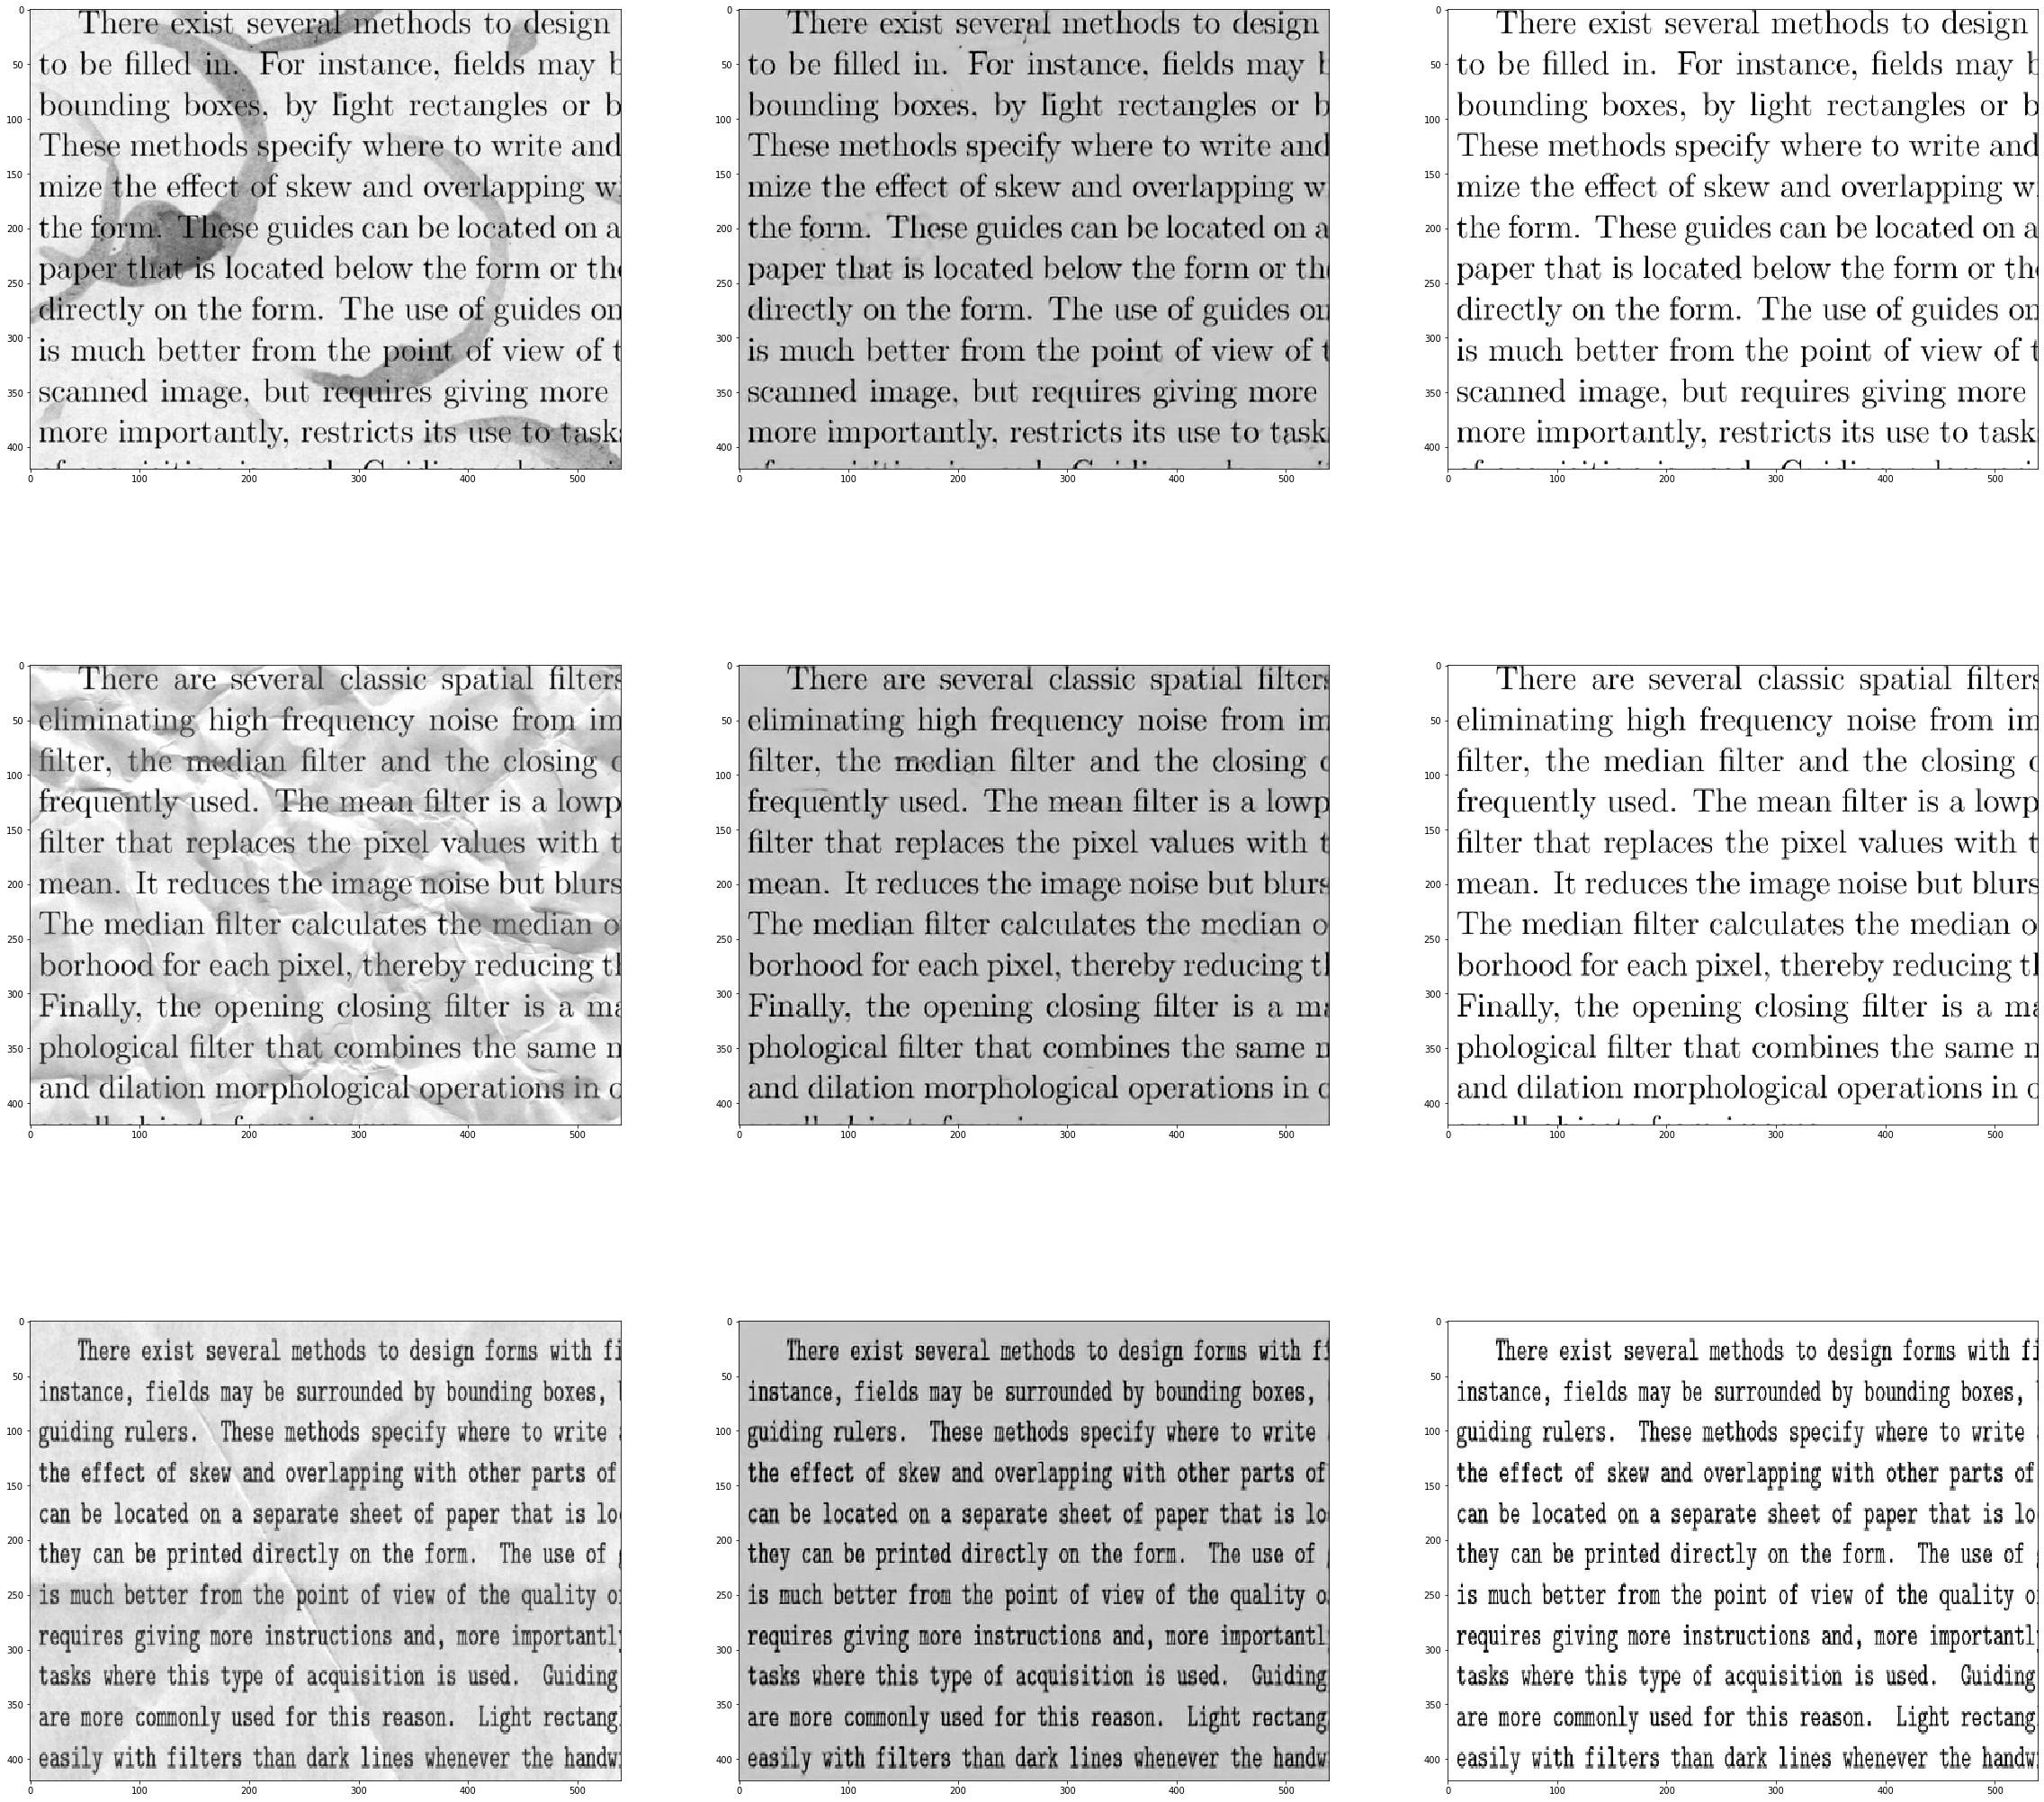

In [ ]:
f, ax = plt.subplots(3,3, figsize=(40,38))
for i in range(3):
    ax[i][0].imshow(np.squeeze(X_valid[i].astype('float32')), cmap='gray')
    ax[i][1].imshow(np.squeeze(predicted_label[i].astype('float32')), cmap='gray')
    ax[i][2].imshow(np.squeeze(y_valid[i].astype('float32')), cmap='gray')
plt.show()

In [ ]:
sample_img = load_img('0098.jpg', color_mode = "grayscale", target_size=(420,540))
sample_img = img_to_array(sample_img)
sample_img = sample_img.astype('float32')/255.
sample_img = sample_img.reshape((-1, 420, 540, 1))

In [ ]:
np.squeeze(model.predict(sample_img))

array([[0.9662977 , 0.9255873 , 0.9691779 , ..., 1.0102971 , 1.0045007 ,
        1.0260669 ],
       [1.0388104 , 0.98597986, 1.0268493 , ..., 0.99656755, 0.9821861 ,
        1.0021396 ],
       [1.0395869 , 0.9971392 , 0.9938295 , ..., 0.9776265 , 0.98107266,
        1.0039281 ],
       ...,
       [0.98491937, 0.9240009 , 0.9797948 , ..., 0.9609968 , 0.9386779 ,
        0.9428427 ],
       [1.0091532 , 0.9609116 , 1.0194416 , ..., 1.0191114 , 0.97871864,
        0.99543434],
       [0.9842885 , 0.94350564, 0.97612405, ..., 0.99569625, 0.92914736,
        0.91855586]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


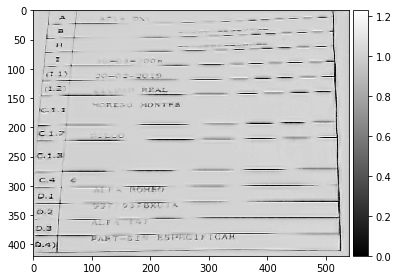

In [ ]:
imshow(np.squeeze(model.predict(sample_img).astype('float32')), cmap='gray')

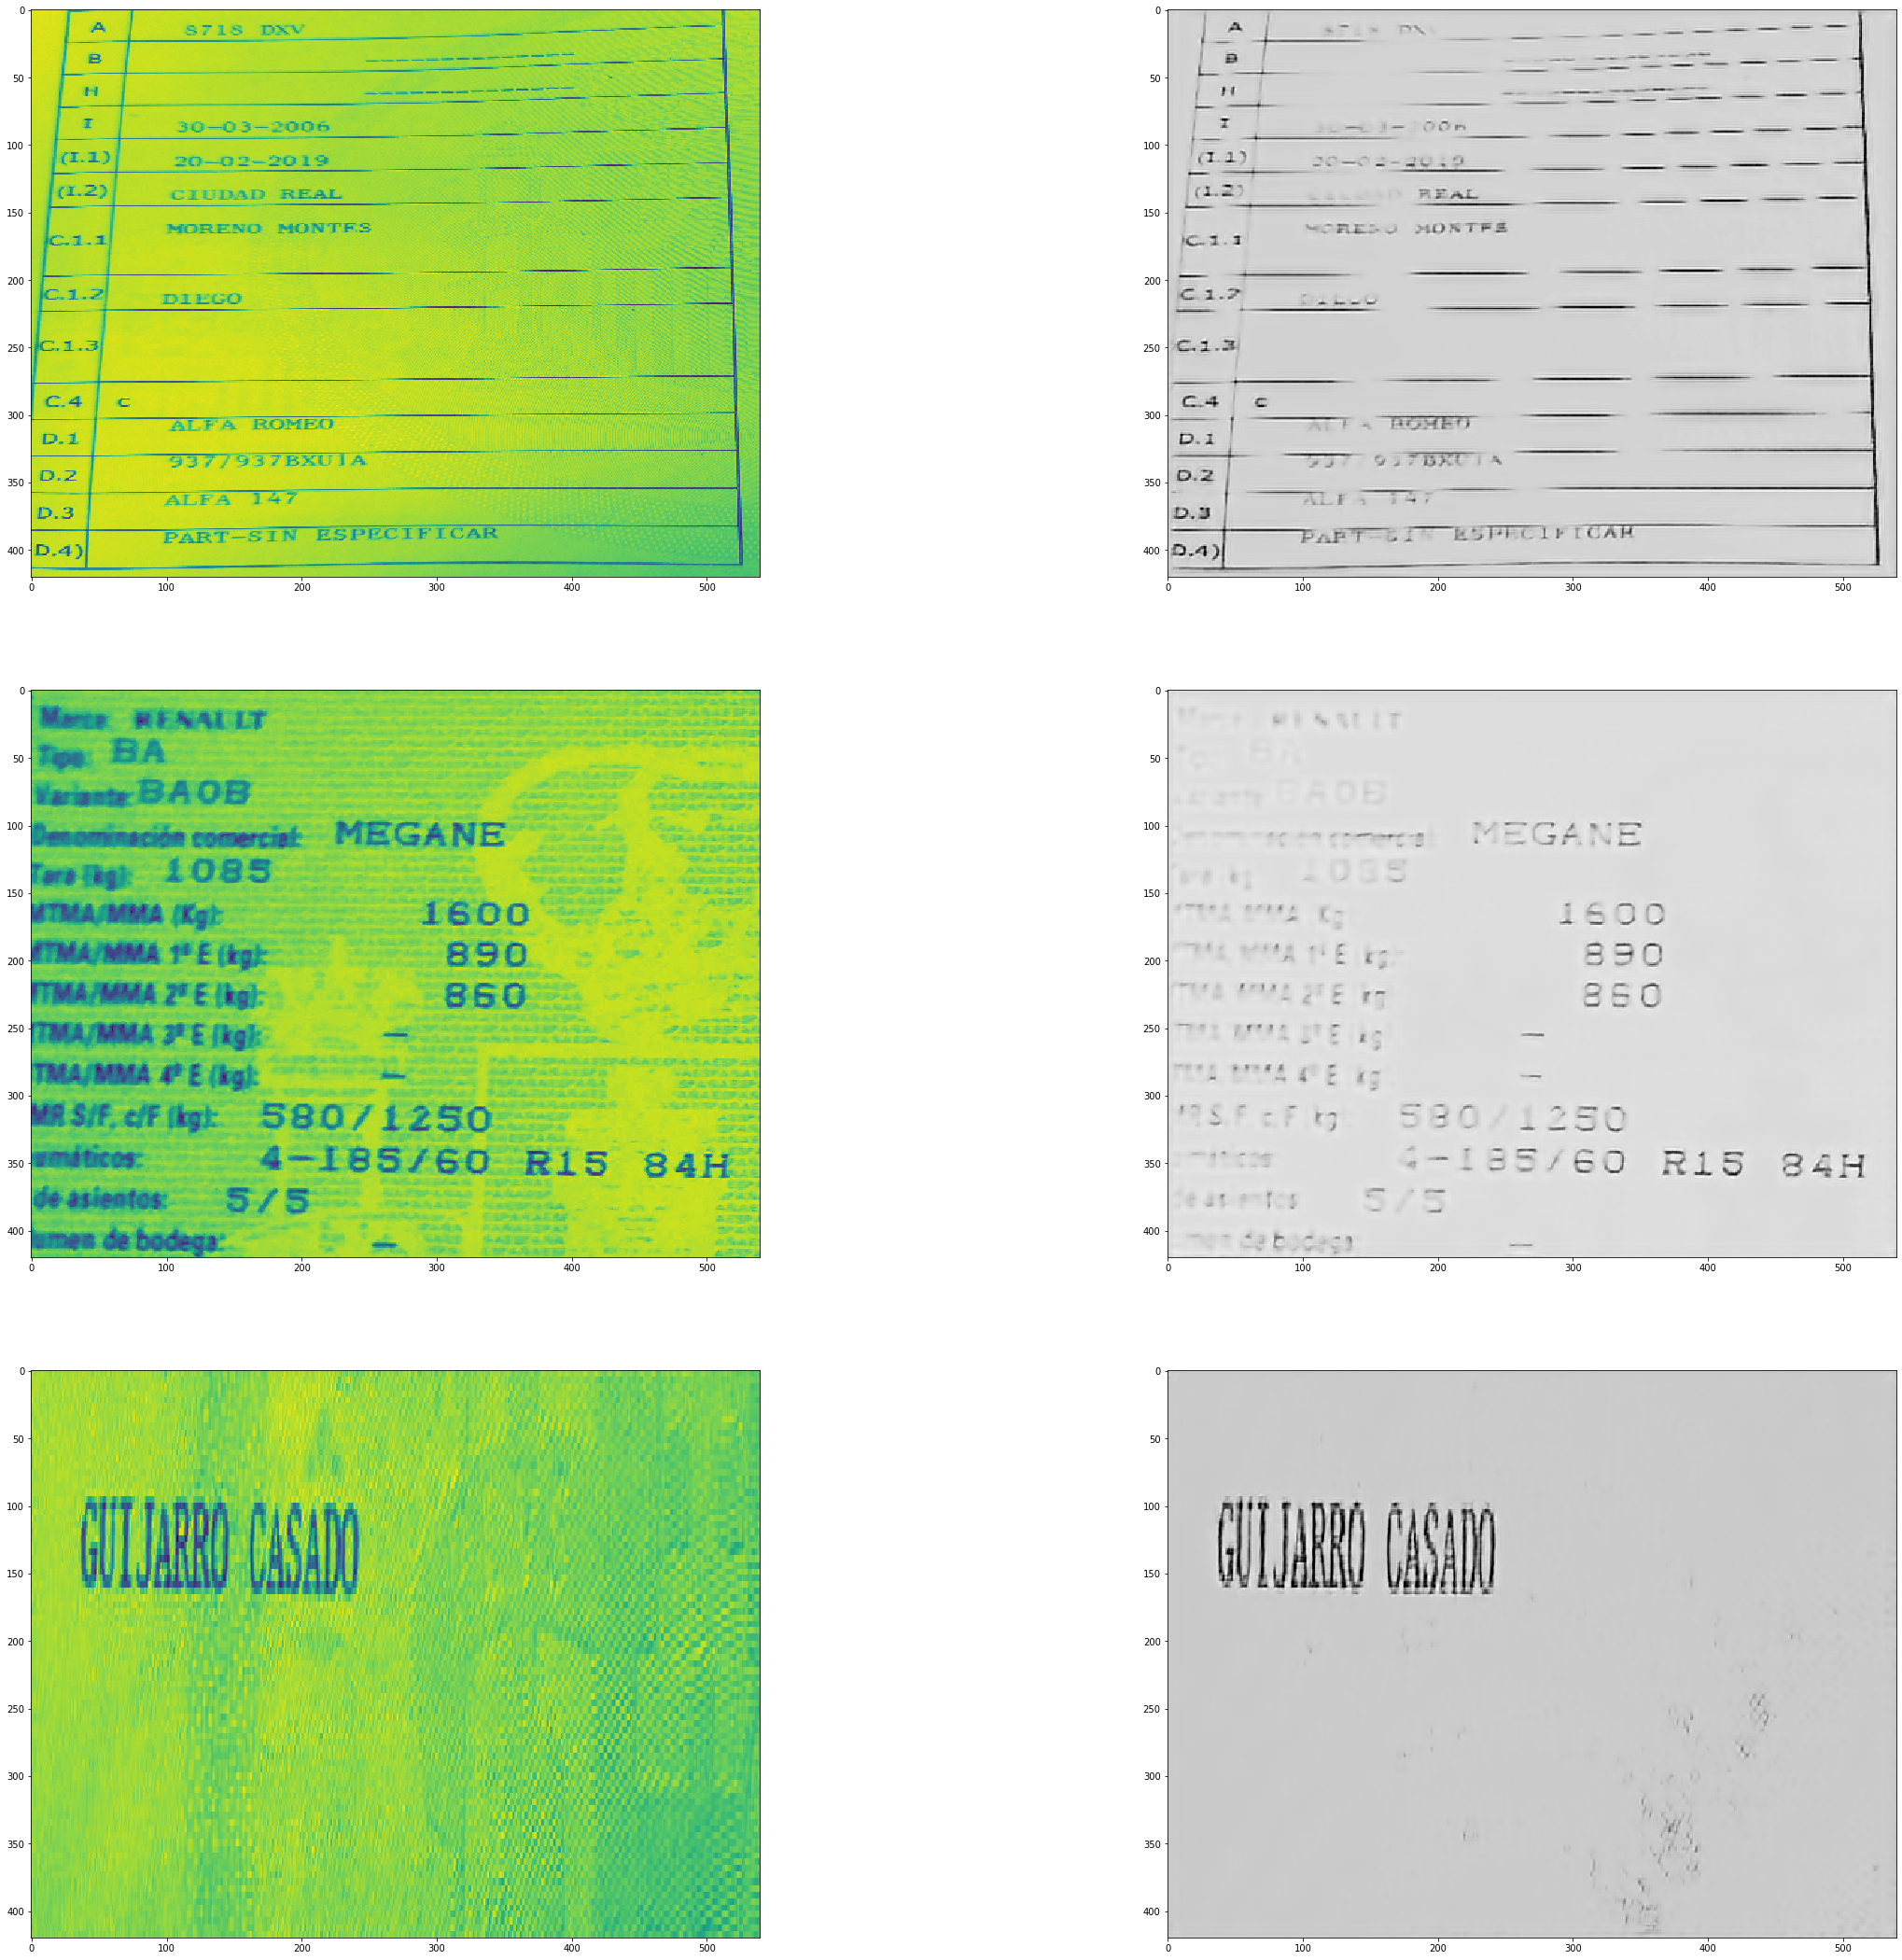

In [ ]:
f, ax = plt.subplots(3,2, figsize=(40,38))
imagen = ['0098.jpg','0145_1.jpg','0062.png']
for i in range(3):
    sample_img2 = load_img(imagen[i], color_mode = "grayscale", target_size=(420,540))
    sample_img = img_to_array(sample_img2)
    sample_img = sample_img.astype('float32')/255.
    sample_img = sample_img.reshape((-1, 420, 540, 1))
    ax[i][0].imshow(sample_img2)
    ax[i][1].imshow(np.squeeze(model.predict(sample_img).astype('float32')), cmap='gray')
plt.show()